In [1]:
import numpy as np
import matplotlib.pyplot as plt
from util.plot import plot_cdf,plot_lines,plot_box_by_config,plot_box,plot_grouped_boxplots
from util.consts import balance_size_bins, balance_size_bins_label
from util.plot import color_list
import json
import os
from collections import defaultdict
import csv

flowsim-sldn: (1, 85588), actual_sldn: (1, 85588), sizes: (85588,)
m4_noflowsim_loss005_9-sldn: (1, 85588), actual_sldn: (1, 85588), sizes: (85588,)


/data1/lichenni/projects/per-flow-sim/util/plot.py:110: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(
/data1/lichenni/projects/per-flow-sim/util/plot.py:110: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(
/data1/lichenni/projects/per-flow-sim/util/plot.py:110: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


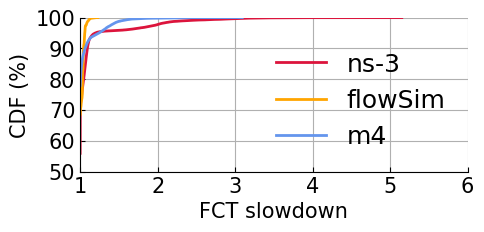

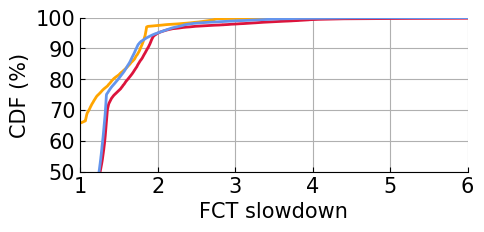

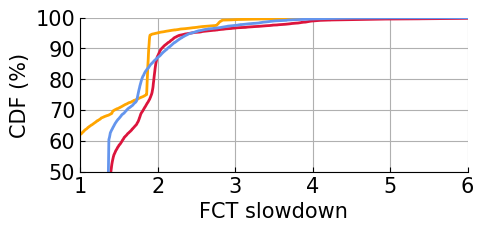

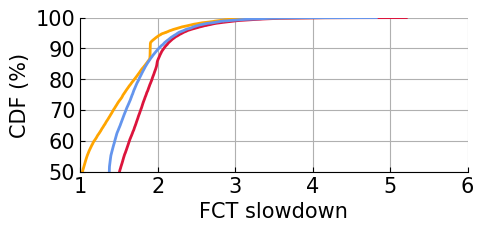

In [16]:
size_bins = [0, 1 * 1024, 200 * 1024, 1024 * 1024, np.inf]  # Sizes in bytes
size_bin_labels = ['<=1KB', '1KB-200KB','200KB-1MB', '1MB']
legend_list=['ns-3','flowSim','m4']
# model_instance_list=['flowsim',"new_loss01_mlp1_10"]
model_instance_list=['flowsim',"m4_noflowsim_loss005_11"]
n_methods = len(legend_list)
fig_index=0
for scenario_idx in [0]:
    empirical_str = f"_large{scenario_idx}"
    
    sizes=np.load(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_7/data/{scenario_idx}/ns3/fsize.npy')

    error_list=[]
    error_size_list=[]
    for model_idx,model_instance in enumerate(model_instance_list):
        data_m4 = np.load(f'./res/{model_instance}{empirical_str}.npz')
        sldn = data_m4['sldn']
        predicted_sldns = sldn[:, :, 0]
        actual_sldns = sldn[:,:, 1]
        print(f"{model_instance}-sldn: {predicted_sldns.shape}, actual_sldn: {actual_sldns.shape}, sizes: {sizes.shape}")
        assert predicted_sldns.size == actual_sldns.size==sizes.size
        
        if model_idx==0:
            error_list.extend([actual_sldns,predicted_sldns])
            error_size_list.extend([sizes,sizes])
        else:
            error_list.append(predicted_sldns)
            error_size_list.append(sizes)

    # Initialize a dictionary to store errors per size bucket for each model instance
    error_bins = {legend: {label: np.array([]) for label in size_bin_labels} for legend in legend_list}

    # Process the data for each model instance
    for mi in range(n_methods):
        legend = legend_list[mi]
        errors = error_list[mi]  # Shape: (n_scenarios, n_flows)
        sizes = error_size_list[mi]  # Shape: (n_scenarios, n_flows)

        # Flatten the arrays
        errors_flat = errors.flatten()
        sizes_flat = sizes.flatten()

        # Assign flows to size buckets
        size_indices = np.digitize(sizes_flat, size_bins)

        # Collect errors for each size bucket
        for b in range(1, len(size_bins)):
            bin_mask = size_indices == b
            bin_errors = errors_flat[bin_mask]
            error_bins[legend][size_bin_labels[b - 1]] = np.concatenate((error_bins[legend][size_bin_labels[b - 1]], bin_errors))

    # Plot the CDF of errors for each size bucket
    for idx, size_bin_label in enumerate(size_bin_labels):
        plot_data=[]
        for mi, legend in enumerate(legend_list):
            bin_errors = error_bins[legend][size_bin_label]
            plot_data.append(bin_errors)
        plot_cdf(plot_data,f'./figs/eva_large_scale_cdf_{idx}.pdf',legend_list if idx==0 else [],'FCT slowdown',legend_font=18,group_size=3,loc=4,rotate_xaxis=False,ylim_low=50,log_switch=False,xlim_bottom=1, fig_idx=fig_index,xlim=6)
        fig_index+=1

-----------------
flowsim_large0-sldn: (85588,)
p99 slowdown: 2.63869074761659, 3.325010334041024
m4_noflowsim_7_large0-sldn: (85588,)
p99 slowdown: 3.0154317975044287, 3.325010334041024
m4_noflowsim_loss005_11_large0-sldn: (85588,)
p99 slowdown: 3.011682918071748, 3.325010334041024
m4_hope01_10_large0-sldn: (85588,)
p99 slowdown: 3.2281565141678024, 3.325010334041024
mean error:[13.66592765042259, 5.874461950698157, 6.427994258204044, 6.96055866818135]
p95 error: [36.5008425688073, 21.730311434578663, 20.303322981324925, 20.726590278350905]
p99 sldn error: [20.64112642  9.31060374  9.42335164  2.91288779]


/data1/lichenni/projects/per-flow-sim/util/plot.py:306: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(
/data1/lichenni/projects/per-flow-sim/util/plot.py:306: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(
/data1/lichenni/projects/per-flow-sim/util/plot.py:306: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(
/data1/lichenni/projects/per-flow-sim/util/plot.py:306: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


-----------------
flowsim_large1-sldn: (50788,)
p99 slowdown: 1.9803868636720396, 2.3886448469420163
m4_noflowsim_7_large1-sldn: (50788,)
p99 slowdown: 2.135091788768768, 2.3886448469420163
m4_noflowsim_loss005_11_large1-sldn: (50788,)
p99 slowdown: 2.1940949010848994, 2.3886448469420163
m4_hope01_10_large1-sldn: (50788,)
p99 slowdown: 2.3740330624580355, 2.3886448469420163
mean error:[13.669938981268052, 4.285252618973295, 4.783027327588347, 6.032890459980511]
p95 error: [32.908357346130565, 16.080371117498018, 13.259044413787763, 14.893878143021864]
p99 sldn error: [17.0916151  10.61493334  8.14478327  0.61171859]
-----------------
flowsim_large2-sldn: (92281,)
p99 slowdown: 2.435299607892364, 3.2627295299072308
m4_noflowsim_7_large2-sldn: (92281,)
p99 slowdown: 2.5884204864501887, 3.2627295299072308
m4_noflowsim_loss005_11_large2-sldn: (92281,)
p99 slowdown: 2.9574261665344213, 3.2627295299072308
m4_hope01_10_large2-sldn: (92281,)
p99 slowdown: 2.896461200714105, 3.2627295299072308


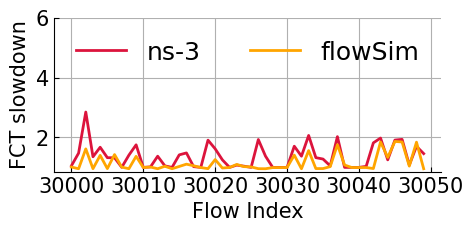

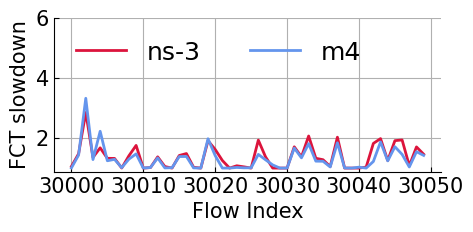

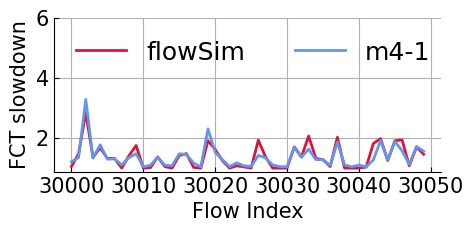

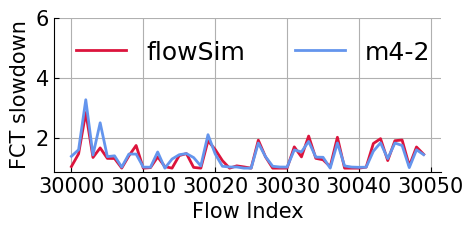

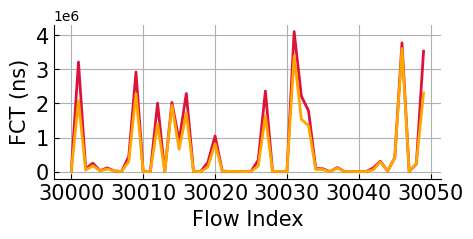

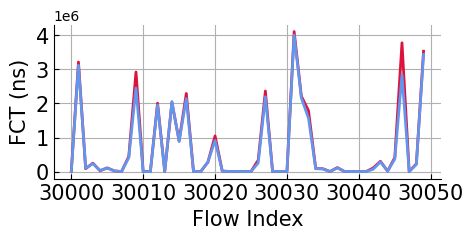

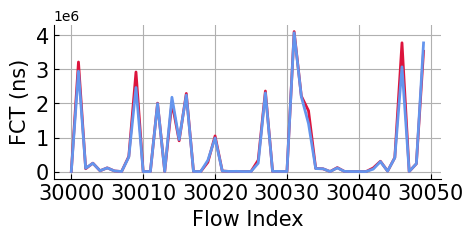

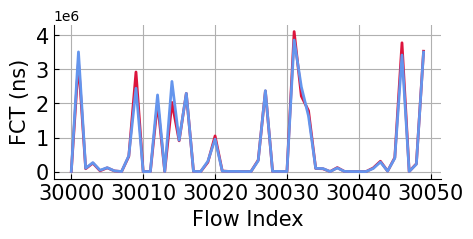

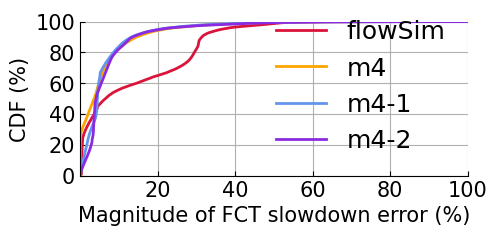

In [10]:
empirical_str = ""

legend_list=['flowSim','m4','m4-1','m4-2']
for scenario_idx,scenario_str in enumerate(["_large0","_large1","_large2"]):
    model_instance_list=[f'flowsim{scenario_str}',f'm4_noflowsim_7{scenario_str}',f'm4_noflowsim_loss005_11{scenario_str}',f'm4_hope01_10{scenario_str}']
    error_list=[]
    error_list_p99=[]
    sldn_list=[]
    fct_list=[]
    print(f"-----------------")
    for model_instance in model_instance_list:
        data_m4 = np.load(f'./res/{model_instance}{empirical_str}.npz')
        sldn = data_m4['sldn']
        predicted_sldns = sldn[:, :, 0].squeeze()
        actual_sldns = sldn[:,:, 1].squeeze()
        print(f"{model_instance}-sldn: {predicted_sldns.shape}")
        
        fct=data_m4['fct']
        predicted_fcts = fct[:, :, 0].squeeze()
        actual_fcts = fct[:,:, 1].squeeze()
        
        # calculate the relative error
        relative_error_sldn = np.abs(actual_sldns - predicted_sldns) / actual_sldns *100
        sldn_list.append([actual_sldns,predicted_sldns])
        fct_list.append([actual_fcts,predicted_fcts])
        error_list.append(relative_error_sldn)
        
        sldn_p99_est=np.percentile(predicted_sldns,99)
        sldn_p99_act=np.percentile(actual_sldns,99)
        print(f"p99 slowdown: {sldn_p99_est}, {sldn_p99_act}")
        error_list_p99.append(np.abs(sldn_p99_est-sldn_p99_act)/sldn_p99_act*100)
    error_list=np.array(error_list)
    error_list_p99=np.array(error_list_p99)
    sldn_list=np.array(sldn_list)
    fct_list=np.array(fct_list)
    print(f"mean error:{[np.mean(x) for x in error_list]}")
    print(f"p95 error: {[np.percentile(x,95) for x in error_list]}")
    print(f"p99 sldn error: {error_list_p99}")
    
    if scenario_idx==0:  
        fig_idx=0
        data_x=np.arange(30000, 30050)
        linelabels = [["ns-3","flowSim"],["ns-3","m4"],["flowSim","m4-1"],["flowSim","m4-2"]]
        format_idx=[[0,1],[0,2],[0,2],[0,2]]
        for i, (actual, predicted) in enumerate(sldn_list):
            plot_data=[(data_x,actual[data_x]),(data_x,predicted[data_x])]
            plot_lines(
                plot_data,
                f'./figs/eva_large_scale_line_sldn_{i}.pdf',
                linelabels[i],
                x_label="Flow Index",
                y_label="FCT slowdown",
                title=None,
                ylim=6,
                format_idx=format_idx[i],
                legend_cols=2,
                legend_font=18,
                fig_idx=fig_idx,
            )
            fig_idx+=1

        for i, (actual, predicted) in enumerate(fct_list):
            plot_data=[(data_x,actual[data_x]),(data_x,predicted[data_x])]
            plot_lines(
                plot_data,
                f'./figs/eva_large_scale_line_fct_{i}.pdf',
                [],
                x_label="Flow Index",
                y_label="FCT (ns)",
                title=None,
                # log_switch=True,
                # ylim=6,
                format_idx=format_idx[i],
                legend_cols=2,
                legend_font=18,
                fig_idx=fig_idx,
            )
            fig_idx+=1
            
        plot_cdf(
            error_list,
            f'./figs/eva_large_scale_cdf.pdf',
            legend_list,
            x_label="Magnitude of FCT slowdown error (%)",
            log_switch=False,
            rotate_xaxis=False,
            xlim=100,
            xlim_bottom=0.01,
            fontsize=15,
            legend_font=18,
            loc=4,
            enable_abs=True,
            group_size=5,
            fig_idx=fig_idx
        )

flowsim-sldn: (98, 20000)
new_loss01_mlp1_10-sldn: (98, 20000)
new_debug_10-sldn: (98, 20000)
m4_noflowsim_7-sldn: (98, 20000)
m4_noflowsim_loss005_11-sldn: (98, 20000)
m4_noflowsim_loss005_9-sldn: (98, 20000)
m4_hope01_10-sldn: (98, 20000)
worst idx: [64 65 49 41 26 63 57 17 68 52]
p95 error:[26.94787566268004, 18.099133859702782, 18.569340112497336, 16.5898566053141, 15.793637309571617, 15.113428792142127, 17.26825736708362]
mean error:[13.495534070075042, 7.829408845077062, 8.548176185786138, 7.932497504389624, 7.968718068682013, 7.681631470910756, 8.007592033783986]
median error:[11.33384600925967, 6.737676240218278, 7.322517823539165, 7.094790100268213, 7.136427733574661, 6.950498336608967, 7.054164130339123]
p99 error:[29.050914729742967, 9.679961096163877, 12.2141262724184, 9.20462305475409, 7.155018285298158, 8.931733229507428, 8.271446305755127]


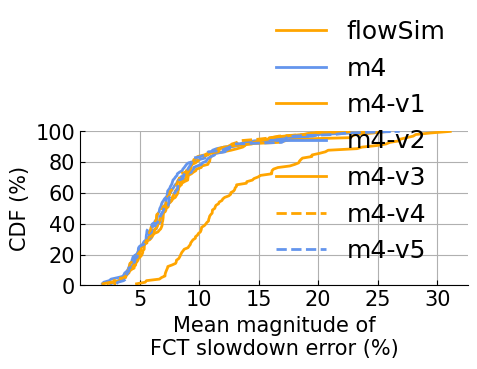

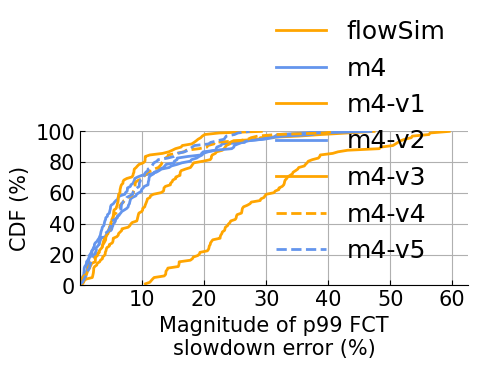

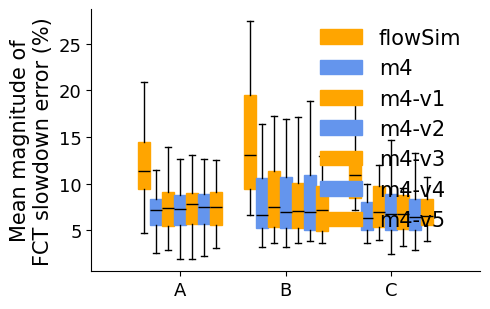

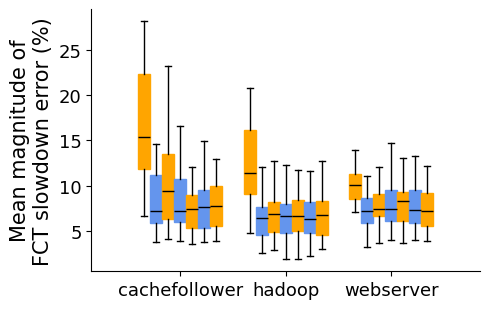

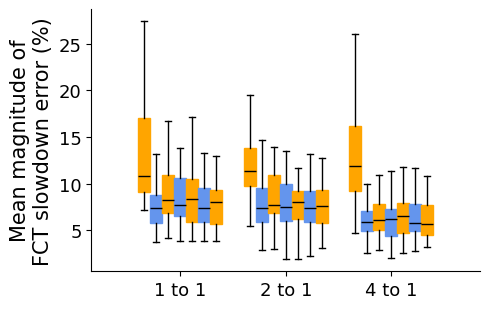

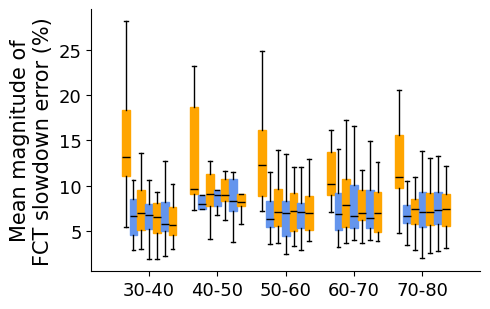

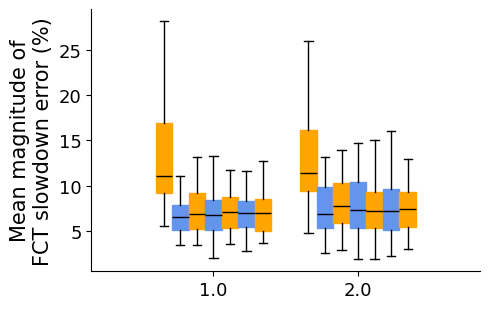

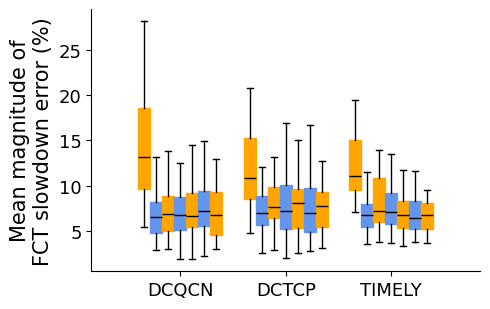

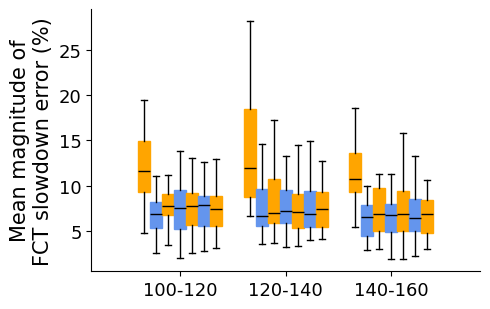

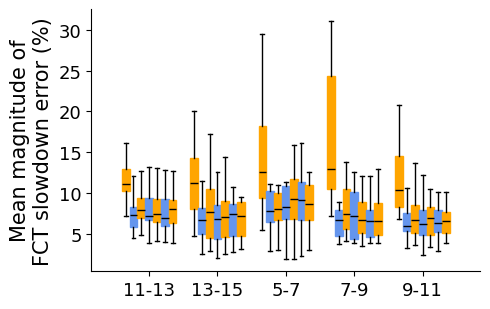

In [9]:
n_scenario=100
empirical_str = "eval_test"
legend_list=['flowSim','m4','m4-v1','m4-v2','m4-v3','m4-v4','m4-v5']
# model_instance_list=['flowsim','new_loss01_mlp1_10','m4_noflowsim_7','m4_noflowsim_loss005_11','m4_noflowsim_loss005_9']
model_instance_list=['flowsim','new_loss01_mlp1_10','new_debug_10','m4_noflowsim_7','m4_noflowsim_loss005_11','m4_noflowsim_loss005_9','m4_hope01_10']
                     
n_methods = len(legend_list)
config_file=f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/spec/eval_test.mix.json'
configs=json.load(open(config_file))

index_list_ori=[]
for i in range(n_scenario):
    if os.path.exists(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/{empirical_str}/{i}/ns3/flowsim_fct.npy'):
        sizes=np.load(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/{empirical_str}/{i}/ns3/fsize.npy')
        fcts=np.load(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/{empirical_str}/{i}/ns3/fct_topology_flows.npy')
        if sizes.size==fcts.size:
            index_list_ori.append(i)
index_list=[]
config_list=[]
for idx,i in enumerate(index_list_ori):
    config=configs[i]
    spatial=config['spatial'].split('/')[-1].split('.')[0].split('_')[1].upper()
    size_dist=config['size_dist'].split('/')[-1].split('.')[0].split('-')[0]
    cluster=config['cluster'].split('/')[-1].split('.')[0].split('_')
    cluster=f"{cluster[1]} to {cluster[3]}"
    max_load=float(config['max_load'])
    lognorm_sigma=float(config['lognorm_sigma'])
    cc=config['cc'].upper()
    bfsz=float(config['bfsz'])
    fwin=float(config['window'])
    
    config_list.append([spatial, size_dist, cluster, max_load, lognorm_sigma,cc,bfsz,fwin])
    index_list.append(idx)
config_list=np.array(config_list)

error_list=[]
error_list_p99=[]
for model_instance in model_instance_list:
    data_m4 = np.load(f'./res/{model_instance}{empirical_str}.npz')
    sldn = data_m4['fct']
    predicted_sldns = sldn[index_list, :, 0]
    actual_sldns = sldn[index_list,:, 1]
    print(f"{model_instance}-sldn: {predicted_sldns.shape}")
    
    predicted_sldns[predicted_sldns==0]=1
    actual_sldns[actual_sldns==0]=1
    # calculate the relative error
    relative_error_sldn = np.mean(np.abs(actual_sldns - predicted_sldns) / actual_sldns *100, axis=1)
    # relative_error_sldn = np.abs(actual_sldns - predicted_sldns) / actual_sldns *100
    sldn_p99_est=np.percentile(predicted_sldns,99,axis=1)
    sldn_p99_act=np.percentile(actual_sldns,99,axis=1)
    
    error_list.append(relative_error_sldn)
    error_list_p99.append(np.abs(sldn_p99_est-sldn_p99_act)/sldn_p99_act*100)
config_list=config_list[index_list]
error_list=np.array(error_list)
error_list_p99=np.array(error_list_p99)

sorted_index=np.argsort(error_list[0])
print(f"worst idx: {sorted_index[-10:]}")
# print(f"worst perf: {error_list[2][sorted_index[-10:]]}, {error_list[1][sorted_index[-10:]]}")

print(f"p95 error:{[np.percentile(x,95) for x in error_list]}")
print(f"mean error:{[np.mean(x) for x in error_list]}")
print(f"median error:{[np.median(x) for x in error_list]}")
print(f"p99 error:{[np.mean(x) for x in error_list_p99]}")

fig_idx=0
plot_cdf(
    error_list,
    f"./figs/eva_cdf_mean.pdf",
    legend_list,
    x_label="Mean magnitude of\nFCT slowdown error (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=18,
    loc=4,
    enable_abs=True,
    group_size=5,
    colors=["orange",
    "cornflowerblue"],
    fig_idx=fig_idx,
)
fig_idx+=1

plot_cdf(
    error_list_p99,
    f"./figs/eva_cdf_p99.pdf",
    legend_list,
    x_label="Magnitude of p99 FCT\nslowdown error (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=18,
    loc=4,
    enable_abs=True,
    group_size=5,
    colors=["orange",
    "cornflowerblue"],
    fig_idx=fig_idx,
)
fig_idx+=1

# Discretize the max_load values
max_load_values = np.array([config[3] for config in config_list], dtype=float)
bins = [0.3,0.4, 0.5, 0.6, 0.70,0.80]
labels = ['30-40', '40-50', '50-60', '60-70','70-80']
max_load_bins = np.digitize(max_load_values, bins, right=False) - 1
max_load_labels = [labels[i] for i in max_load_bins]
for idx, config in enumerate(config_list):
    config[3] = max_load_labels[idx]
    
bfsz_values = np.array([config[6] for config in config_list], dtype=float)
bfsz_values=bfsz_values*10
bins = [100,120,140,160,180]
labels = ['100-120', '120-140', '140-160', '160-180']
bfsz_bins = np.digitize(bfsz_values, bins, right=False) - 1
bfz_labels = [labels[i] for i in bfsz_bins]
for idx, config in enumerate(config_list):
    config[6] = bfz_labels[idx]

fwin_values=np.array([config[7] for config in config_list], dtype=float)
bins = [5000,7000,9000,11000,13000,15000]
labels = ['5-7', '7-9', '9-11', '11-13', '13-15']
fwin_bins = np.digitize(fwin_values, bins, right=False) - 1
fwin_labels = [labels[i] for i in fwin_bins]
for idx, config in enumerate(config_list):
    config[7] = fwin_labels[idx]
# Convert config_list to a NumPy array for easier indexing
config_list = np.array(config_list)

# Generate plots for each configuration attribute
config_attributes = ["Traffic matrix", "Flow size distribution", "Oversubscription", "Max load (%)", "Burstiness (log-normal's $\sigma$)", "Congestion control algorithm", "Buffer size (KB)", "Init. window size (KB)"]
error_list=error_list.T
for i, config_name in enumerate(config_attributes):
    plot_box_by_config(error_list, legend_list if i==0 else None,n_methods=len(legend_list),config_list=config_list, config_index=i, config_name=config_name,fig_idx=fig_idx,loc=1,file_name=f"figs/eva_box_{i}.pdf",y_label="Mean magnitude of\nFCT slowdown error (%)")
    fig_idx+=1

flowsim-sldn: (100, 20000)
m4_noflowsim_loss005_11-sldn: (100, 20000)
m4_noflowsim_loss005_nosize_10-sldn: (100, 20000)
m4_noflowsim_loss005_noqueue_10-sldn: (100, 20000)
p95 error:[26.891505983290557, 15.780139604045164, 28.77022813933718, 22.874225591099062]
mean error:[13.508511277029257, 7.933641679280073, 11.055784650070471, 10.065105292162077]
median error:[11.33384600925967, 7.09461240106082, 9.539269960534492, 8.586090418285675]
p99 error:[29.234773649699395, 7.069953473221485, 21.04586362230436, 13.584302851570598]


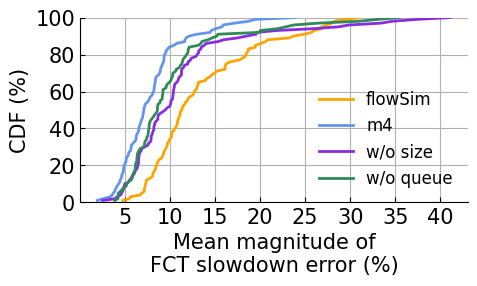

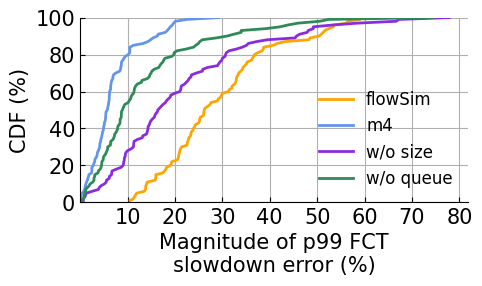

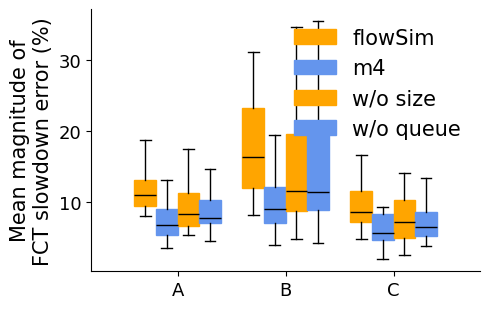

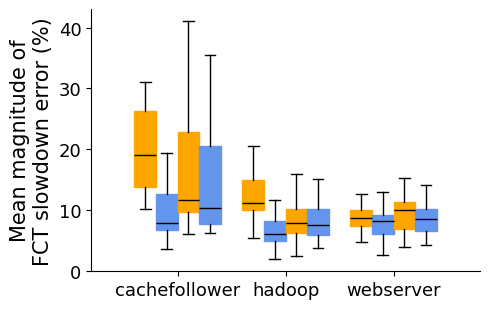

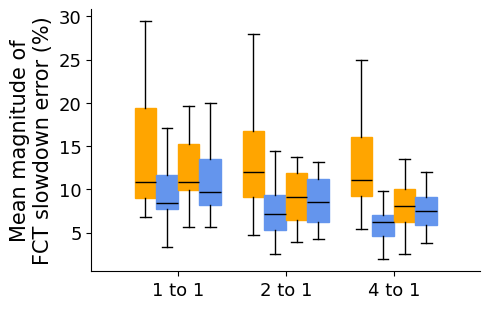

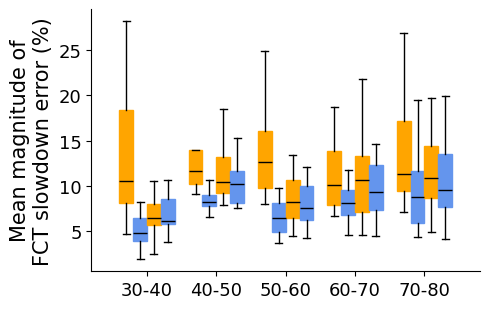

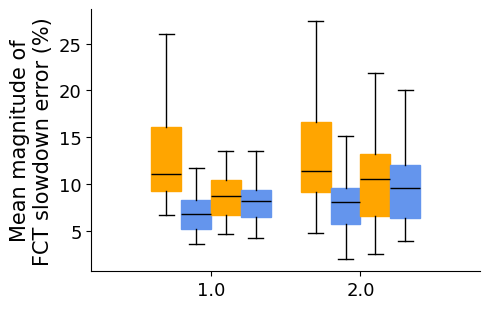

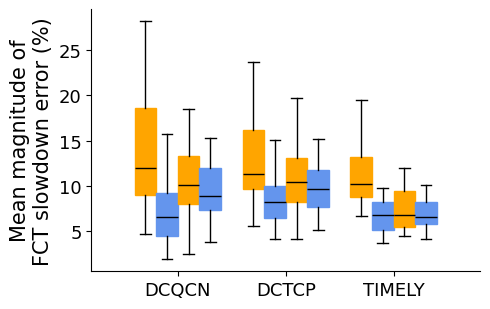

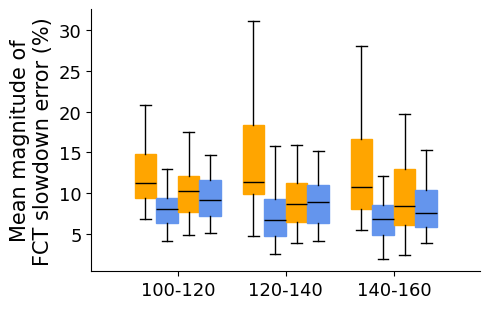

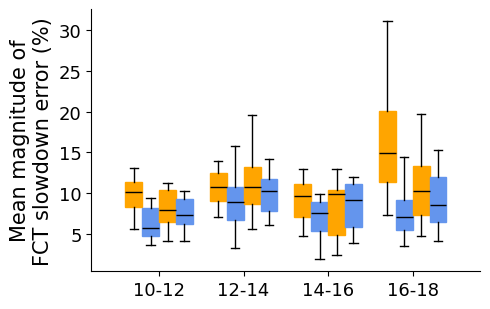

In [18]:
n_scenario=100
empirical_str = "eval_test"
legend_list=['flowSim','m4','w/o size','w/o queue']
model_instance_list=['flowsim','m4_noflowsim_loss005_11','m4_noflowsim_loss005_nosize_10','m4_noflowsim_loss005_noqueue_10']
                     
n_methods = len(legend_list)
config_file=f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/spec/eval_test.mix.json'
configs=json.load(open(config_file))

index_list_ori=[]
for i in range(n_scenario):
    if os.path.exists(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/{empirical_str}/{i}/ns3/flowsim_fct.npy'):
        index_list_ori.append(i)
index_list=[]
config_list=[]
for idx,i in enumerate(index_list_ori):
    config=configs[i]
    spatial=config['spatial'].split('/')[-1].split('.')[0].split('_')[1].upper()
    size_dist=config['size_dist'].split('/')[-1].split('.')[0].split('-')[0]
    cluster=config['cluster'].split('/')[-1].split('.')[0].split('_')
    cluster=f"{cluster[1]} to {cluster[3]}"
    max_load=float(config['max_load'])
    lognorm_sigma=float(config['lognorm_sigma'])
    cc=config['cc'].upper()
    bfsz=float(config['bfsz'])
    fwin=float(config['window'])
    
    config_list.append([spatial, size_dist, cluster, max_load, lognorm_sigma,cc,bfsz,fwin])
    index_list.append(idx)
config_list=np.array(config_list)

error_list=[]
error_list_p99=[]
for model_instance in model_instance_list:
    data_m4 = np.load(f'./res_0118/{model_instance}{empirical_str}.npz')
    sldn = data_m4['fct']
    predicted_sldns = sldn[index_list, :, 0]
    actual_sldns = sldn[index_list,:, 1]
    print(f"{model_instance}-sldn: {predicted_sldns.shape}")
    
    predicted_sldns[predicted_sldns==0]=1
    actual_sldns[actual_sldns==0]=1
    # calculate the relative error
    relative_error_sldn = np.mean(np.abs(actual_sldns - predicted_sldns) / actual_sldns *100, axis=1)
    # relative_error_sldn = np.abs(actual_sldns - predicted_sldns) / actual_sldns *100
    sldn_p99_est=np.percentile(predicted_sldns,99,axis=1)
    sldn_p99_act=np.percentile(actual_sldns,99,axis=1)
    
    error_list.append(relative_error_sldn)
    error_list_p99.append(np.abs(sldn_p99_est-sldn_p99_act)/sldn_p99_act*100)
config_list=config_list[index_list]
error_list=np.array(error_list)
error_list_p99=np.array(error_list_p99)

print(f"p95 error:{[np.percentile(x,95) for x in error_list]}")
print(f"mean error:{[np.mean(x) for x in error_list]}")
print(f"median error:{[np.median(x) for x in error_list]}")
print(f"p99 error:{[np.mean(x) for x in error_list_p99]}")

fig_idx=0
plot_cdf(
    error_list,
    f"./figs/eva_ablation_mean.pdf",
    legend_list,
    x_label="Mean magnitude of\nFCT slowdown error (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=12,
    loc=4,
    enable_abs=True,
    group_size=5,
    colors=["orange",
    "cornflowerblue",
    "blueviolet",
    "seagreen",
    'tomato'],
    fig_idx=fig_idx,
    fig_size=(5,2.4)
)
fig_idx+=1

plot_cdf(
    error_list_p99,
    f"./figs/eva_ablation_p99.pdf",
    legend_list,
    x_label="Magnitude of p99 FCT\nslowdown error (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=12,
    loc=4,
    enable_abs=True,
    group_size=5,
    colors=["orange",
    "cornflowerblue",
    "blueviolet",
    "seagreen",
    'tomato'],
    fig_idx=fig_idx,
    fig_size=(5,2.4)
)
fig_idx+=1

# Discretize the max_load values
max_load_values = np.array([config[3] for config in config_list], dtype=float)
bins = [0.3, 0.4,0.5, 0.6, 0.7, 0.8]
labels = ['30-40', '40-50', '50-60', '60-70', '70-80']
max_load_bins = np.digitize(max_load_values, bins, right=False) - 1
max_load_labels = [labels[i] for i in max_load_bins]
for idx, config in enumerate(config_list):
    config[3] = max_load_labels[idx]
    
bfsz_values = np.array([config[6] for config in config_list], dtype=float)
bfsz_values=bfsz_values*10
bins = [100,120,140,160,180]
labels = ['100-120', '120-140', '140-160', '160-180']
bfsz_bins = np.digitize(bfsz_values, bins, right=False) - 1
bfz_labels = [labels[i] for i in bfsz_bins]
for idx, config in enumerate(config_list):
    config[6] = bfz_labels[idx]

fwin_values=np.array([config[7] for config in config_list], dtype=float)
bins = [10000,12000,14000,16000,18000]
labels = ['10-12', '12-14', '14-16', '16-18']
fwin_bins = np.digitize(fwin_values, bins, right=False) - 1
fwin_labels = [labels[i] for i in fwin_bins]
for idx, config in enumerate(config_list):
    config[7] = fwin_labels[idx]
# Convert config_list to a NumPy array for easier indexing
config_list = np.array(config_list)

# Generate plots for each configuration attribute
config_attributes = ["Traffic matrix", "Flow size distribution", "Oversubscription", "Max load (%)", "Burstiness (log-normal's $\sigma$)", "Congestion control algorithm", "Buffer size (KB)", "Init. window size (KB)"]
error_list=error_list.T
for i, config_name in enumerate(config_attributes):
    plot_box_by_config(error_list, legend_list if i==0 else None,n_methods=len(legend_list),config_list=config_list, config_index=i, config_name=config_name,fig_idx=fig_idx,loc=1,file_name=None,y_label="Mean magnitude of\nFCT slowdown error (%)")
    fig_idx+=1

flowsim-sldn: (100, 20000)
new_debug_noflowsim_10-sldn: (100, 20000)
new_debug_noflowsim_nosize_10-sldn: (100, 20000)
new_debug_noflowsim_noqueue_9-sldn: (100, 20000)
p99 error:[29.470826324191712, 20.47301945570621, 35.92519645386272, 25.980130718913287]
mean error:[13.508511277029257, 8.1842910845216, 12.497997089729985, 11.323161745055115]
median error:[11.33384600925967, 7.297606830686392, 10.802285722013925, 10.587546480636718]
p99 error:[29.234773649699395, 9.16189356524226, 17.33641524687973, 10.87158191679567]


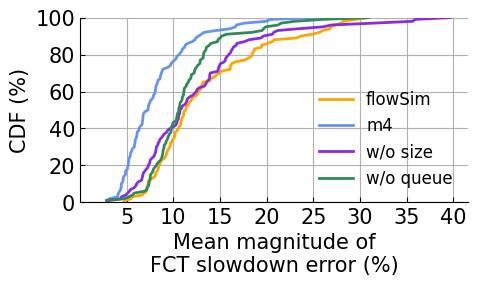

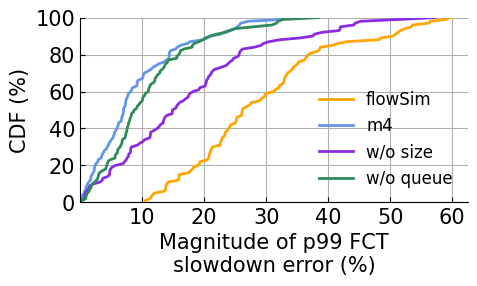

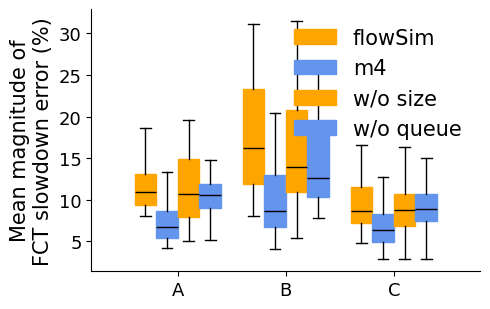

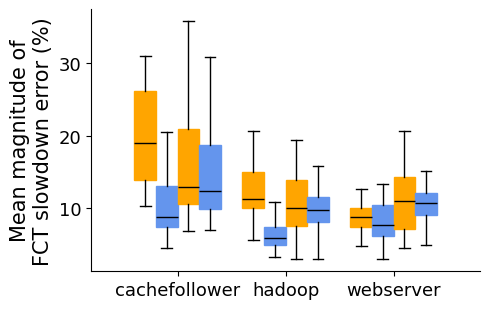

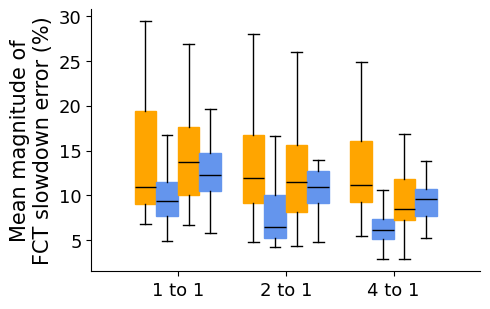

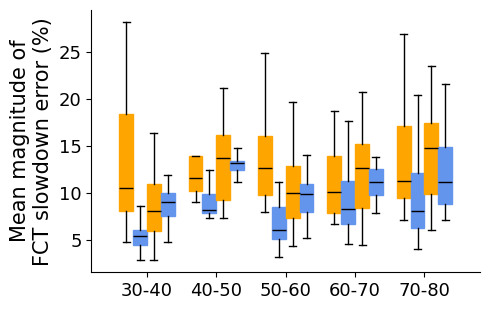

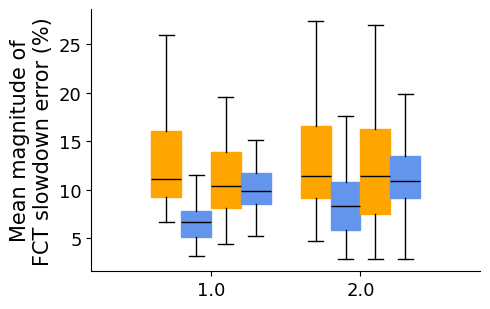

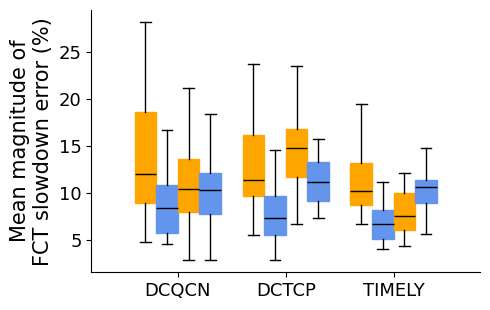

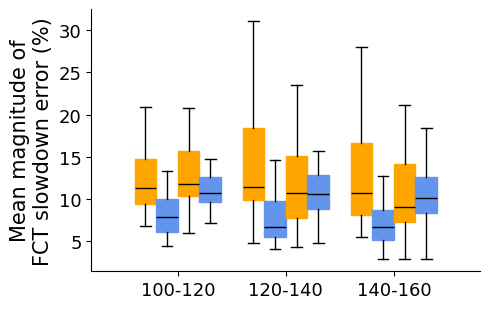

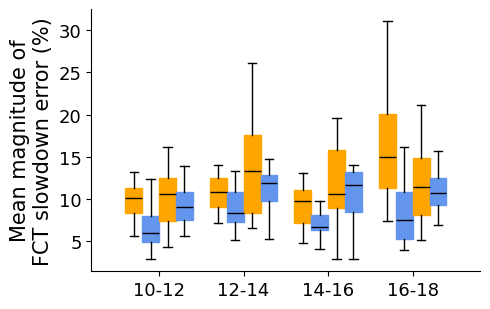

In [4]:
n_scenario=100
empirical_str = "eval_test"
legend_list=['flowSim','m4','w/o size','w/o queue']
model_instance_list=['flowsim','new_debug_noflowsim_10','new_debug_noflowsim_nosize_10','new_debug_noflowsim_noqueue_9']
                     
n_methods = len(legend_list)
config_file=f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/spec/eval_test.mix.json'
configs=json.load(open(config_file))

index_list_ori=[]
for i in range(n_scenario):
    if os.path.exists(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/{empirical_str}/{i}/ns3/flowsim_fct.npy'):
        index_list_ori.append(i)
index_list=[]
config_list=[]
for idx,i in enumerate(index_list_ori):
    config=configs[i]
    spatial=config['spatial'].split('/')[-1].split('.')[0].split('_')[1].upper()
    size_dist=config['size_dist'].split('/')[-1].split('.')[0].split('-')[0]
    cluster=config['cluster'].split('/')[-1].split('.')[0].split('_')
    cluster=f"{cluster[1]} to {cluster[3]}"
    max_load=float(config['max_load'])
    lognorm_sigma=float(config['lognorm_sigma'])
    cc=config['cc'].upper()
    bfsz=float(config['bfsz'])
    fwin=float(config['window'])
    
    config_list.append([spatial, size_dist, cluster, max_load, lognorm_sigma,cc,bfsz,fwin])
    index_list.append(idx)
config_list=np.array(config_list)

error_list=[]
error_list_p99=[]
for model_instance in model_instance_list:
    data_m4 = np.load(f'./res/{model_instance}{empirical_str}.npz')
    sldn = data_m4['fct']
    predicted_sldns = sldn[index_list, :, 0]
    actual_sldns = sldn[index_list,:, 1]
    print(f"{model_instance}-sldn: {predicted_sldns.shape}")
    
    predicted_sldns[predicted_sldns==0]=1
    actual_sldns[actual_sldns==0]=1
    # calculate the relative error
    relative_error_sldn = np.mean(np.abs(actual_sldns - predicted_sldns) / actual_sldns *100, axis=1)
    # relative_error_sldn = np.abs(actual_sldns - predicted_sldns) / actual_sldns *100
    sldn_p99_est=np.percentile(predicted_sldns,99,axis=1)
    sldn_p99_act=np.percentile(actual_sldns,99,axis=1)
    
    error_list.append(relative_error_sldn)
    error_list_p99.append(np.abs(sldn_p99_est-sldn_p99_act)/sldn_p99_act*100)
config_list=config_list[index_list]
error_list=np.array(error_list)
error_list_p99=np.array(error_list_p99)

print(f"p99 error:{[np.percentile(x,99) for x in error_list]}")
print(f"mean error:{[np.mean(x) for x in error_list]}")
print(f"median error:{[np.median(x) for x in error_list]}")
print(f"p99 error:{[np.mean(x) for x in error_list_p99]}")

fig_idx=0
plot_cdf(
    error_list,
    f"./figs/eva_ablation_mean.pdf",
    legend_list,
    x_label="Mean magnitude of\nFCT slowdown error (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=12,
    loc=4,
    enable_abs=True,
    group_size=5,
    colors=["orange",
    "cornflowerblue",
    "blueviolet",
    "seagreen",
    'tomato'],
    fig_idx=fig_idx,
    fig_size=(5,2.4)
)
fig_idx+=1

plot_cdf(
    error_list_p99,
    f"./figs/eva_ablation_p99.pdf",
    legend_list,
    x_label="Magnitude of p99 FCT\nslowdown error (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=12,
    loc=4,
    enable_abs=True,
    group_size=5,
    colors=["orange",
    "cornflowerblue",
    "blueviolet",
    "seagreen",
    'tomato'],
    fig_idx=fig_idx,
    fig_size=(5,2.4)
)
fig_idx+=1

# Discretize the max_load values
max_load_values = np.array([config[3] for config in config_list], dtype=float)
bins = [0.3, 0.4,0.5, 0.6, 0.7, 0.8]
labels = ['30-40', '40-50', '50-60', '60-70', '70-80']
max_load_bins = np.digitize(max_load_values, bins, right=False) - 1
max_load_labels = [labels[i] for i in max_load_bins]
for idx, config in enumerate(config_list):
    config[3] = max_load_labels[idx]
    
bfsz_values = np.array([config[6] for config in config_list], dtype=float)
bfsz_values=bfsz_values*10
bins = [100,120,140,160,180]
labels = ['100-120', '120-140', '140-160', '160-180']
bfsz_bins = np.digitize(bfsz_values, bins, right=False) - 1
bfz_labels = [labels[i] for i in bfsz_bins]
for idx, config in enumerate(config_list):
    config[6] = bfz_labels[idx]

fwin_values=np.array([config[7] for config in config_list], dtype=float)
bins = [10000,12000,14000,16000,18000]
labels = ['10-12', '12-14', '14-16', '16-18']
fwin_bins = np.digitize(fwin_values, bins, right=False) - 1
fwin_labels = [labels[i] for i in fwin_bins]
for idx, config in enumerate(config_list):
    config[7] = fwin_labels[idx]
# Convert config_list to a NumPy array for easier indexing
config_list = np.array(config_list)

# Generate plots for each configuration attribute
config_attributes = ["Traffic matrix", "Flow size distribution", "Oversubscription", "Max load (%)", "Burstiness (log-normal's $\sigma$)", "Congestion control algorithm", "Buffer size (KB)", "Init. window size (KB)"]
error_list=error_list.T
for i, config_name in enumerate(config_attributes):
    plot_box_by_config(error_list, legend_list if i==0 else None,n_methods=len(legend_list),config_list=config_list, config_index=i, config_name=config_name,fig_idx=fig_idx,loc=1,file_name=None,y_label="Mean magnitude of\nFCT slowdown error (%)")
    fig_idx+=1

In [2]:
n_scenario=100
empirical_str = "eval_test_app"
# legend_list=['flowSim','m4','m4-v1','m4-v2','m4-v3']
legend_list=['flowSim','m4']
# model_instance_list=['flowsim','new_loss01_mlp1_10','m4_noflowsim_7','m4_noflowsim_loss005_11','m4_noflowsim_loss005_9']
model_instance_list=['flowsim','new_loss01_mlp1_10']
                     
n_methods = len(legend_list)
config_file=f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/spec/{empirical_str}.mix.json'
configs=json.load(open(config_file))

index_list_ori=[]
for i in range(n_scenario):
    if os.path.exists(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/{empirical_str}/{i}/ns3/fct_topology_flows.npy'):
        # sizes=np.load(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/{empirical_str}/{i}/ns3/fsize.npy')
        # fcts=np.load(f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/{empirical_str}/{i}/ns3/fct_topology_flows.npy')
        # if sizes.size==fcts.size:
        index_list_ori.append(i)
index_list=index_list_ori
print(f"index_list: {len(index_list)}")
error_list=[]
error_list_p99=[]
for model_instance in model_instance_list:
    data_m4 = np.load(f'./res/{model_instance}{empirical_str}.npz')
    sldn = data_m4['fct']
    predicted_sldns = sldn[index_list, :, 0]
    actual_sldns = sldn[index_list,:, 1]
    print(f"{model_instance}-sldn: {predicted_sldns.shape}")
    
    predicted_sldns[predicted_sldns==0]=1
    actual_sldns[actual_sldns==0]=1
    # calculate the relative error
    relative_error_sldn = np.mean(np.abs(actual_sldns - predicted_sldns) / actual_sldns *100, axis=1)
    # relative_error_sldn = np.abs(actual_sldns - predicted_sldns) / actual_sldns *100
    sldn_p99_est=np.percentile(predicted_sldns,99,axis=1)
    sldn_p99_act=np.percentile(actual_sldns,99,axis=1)
    
    error_list.append(relative_error_sldn)
    error_list_p99.append(np.abs(sldn_p99_est-sldn_p99_act)/sldn_p99_act*100)
error_list=np.array(error_list)
error_list_p99=np.array(error_list_p99)

sorted_index=np.argsort(error_list[0])
print(f"worst idx: {sorted_index[-10:]}")
# print(f"worst perf: {error_list[2][sorted_index[-10:]]}, {error_list[1][sorted_index[-10:]]}")

print(f"p99 error:{[np.percentile(x,99) for x in error_list]}")
print(f"mean error:{[np.mean(x) for x in error_list]}")
print(f"median error:{[np.median(x) for x in error_list]}")
print(f"p99 error:{[np.mean(x) for x in error_list_p99]}")

fig_idx=0
plot_cdf(
    error_list,
    f"./figs/eva_cdf_mean.pdf",
    legend_list,
    x_label="Mean magnitude of\nFCT slowdown error (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=18,
    loc=4,
    enable_abs=True,
    group_size=5,
    colors=["orange",
    "cornflowerblue"],
    fig_idx=fig_idx,
)
fig_idx+=1

plot_cdf(
    error_list_p99,
    f"./figs/eva_cdf_p99.pdf",
    legend_list,
    x_label="Magnitude of p99 FCT\nslowdown error (%)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    xlim_bottom=0.01,
    fontsize=15,
    legend_font=18,
    loc=4,
    enable_abs=True,
    group_size=5,
    colors=["orange",
    "cornflowerblue"],
    fig_idx=fig_idx,
)
fig_idx+=1


# Group scenarios into configurations
group_size = 10
num_configs = len(index_list) // group_size
config_labels = [f"$N$={i}" for i in range(num_configs)]

# Reorganize error data by configurations
bucketed_data = []  # Shape: [configs][methods][errors]
for method_idx in range(len(error_list)):
    method_data = []
    for i in range(num_configs):
        start_idx = i * group_size
        end_idx = start_idx + group_size
        method_data.append(error_list[method_idx][start_idx:end_idx])
    bucketed_data.append(method_data)

# Transpose bucketed_data to match [configs][scenarios_per_config]
bucketed_data = list(map(list, zip(*bucketed_data)))

# Plot boxplots for each method grouped by configurations
plot_grouped_boxplots(
    bucketed_data=bucketed_data,
    bucket_labels=config_labels,
    scenario_labels=legend_list,
    # file_name="./figs/grouped_boxplots_configs.pdf",
    file_name=None,
    x_label="The limit of inflight flows per rack $N$",
    y_label="Mean magnitude of\nFCT slowdown error (%)",
    fontsize=13,
    legend_font=15,
    loc="upper left",
    colors=["orange", "cornflowerblue"],
    fig_size=(6, 4),
    # box_width=0.15,
    fig_idx=fig_idx,
    y_ticklabel_fontsize=15,
)


index_list: 100


IndexError: index 10 is out of bounds for axis 0 with size 10

S=0, N=1, #flows: 20000, end_time: 163662739.0
S=0, N=1, #flows: 20000, end_time: 66437414.0
S=0, N=1, #flows: 19987, end_time: 55452514.0
S=0, N=1, #flows: 19951, end_time: 48105198.0
S=0, N=1, #flows: 19847, end_time: 87864100.0
S=0, N=1, #flows: 19084, end_time: 70844018.0
S=0, N=1, #flows: 18426, end_time: 72261324.0
S=0, N=1, #flows: 19028, end_time: 69064668.0
S=0, N=1, #flows: 18245, end_time: 69236503.0
S=0, N=1, #flows: 18102, end_time: 75453949.0
S=0, N=1, #flows: 16142, end_time: 64148845.0
S=0, N=1, #flows: 18542, end_time: 109093803.0
S=0, N=1, #flows: 17713, end_time: 50919188.0
S=0, N=1, #flows: 17038, end_time: 68398483.0
S=0, N=1, #flows: 17473, end_time: 70708681.0
throughput_list: (150,)



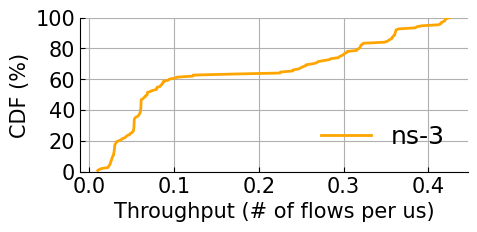

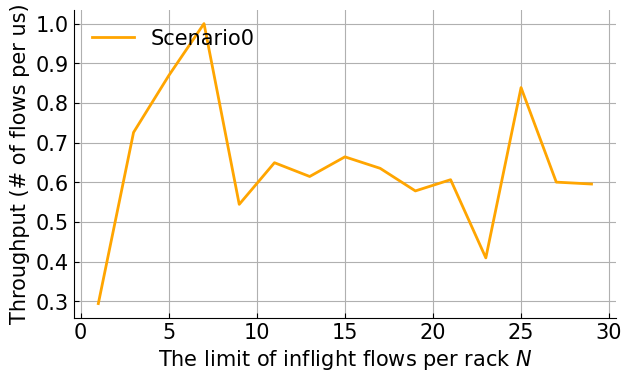

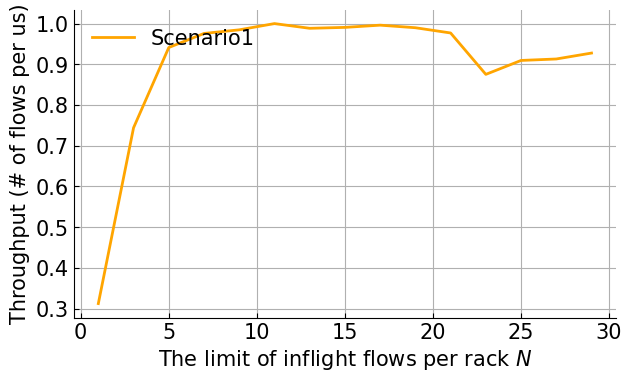

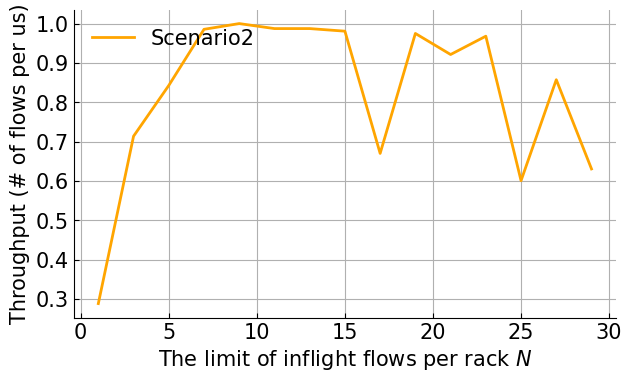

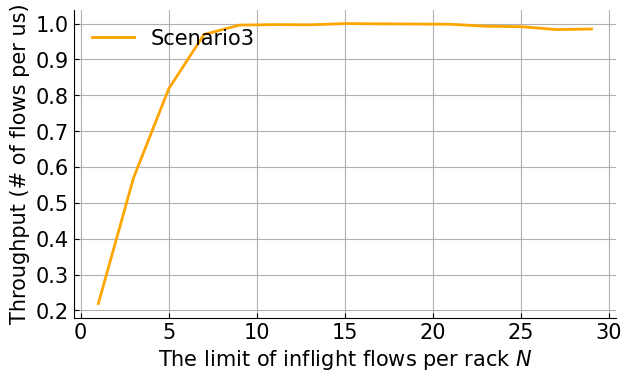

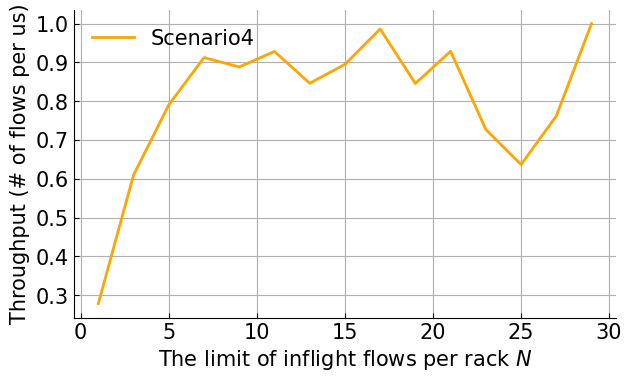

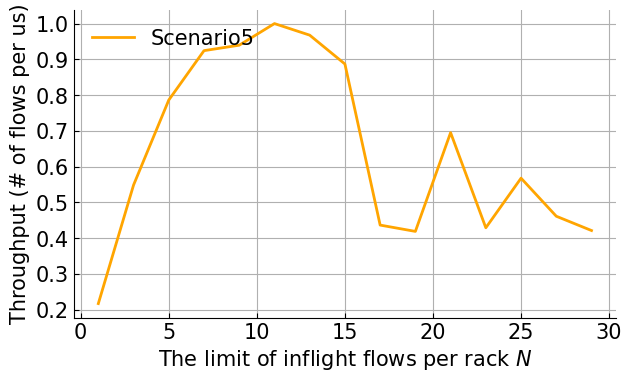

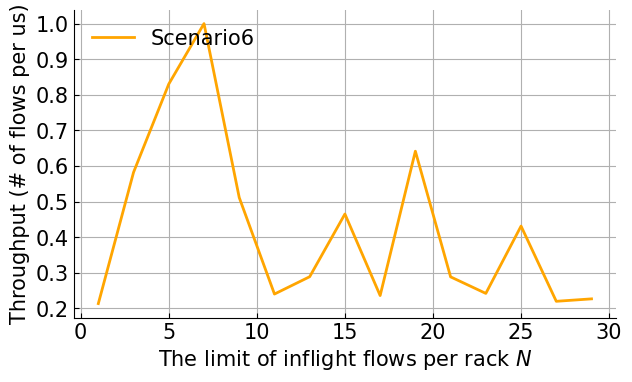

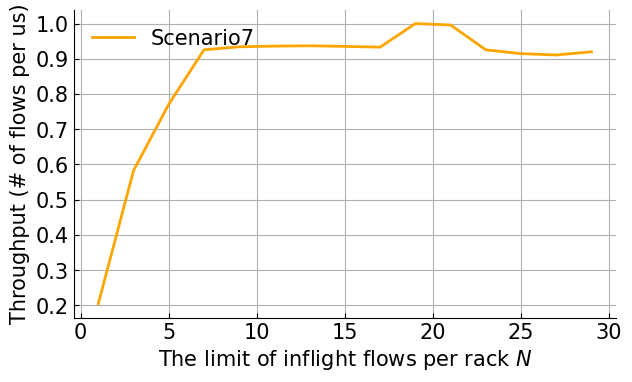

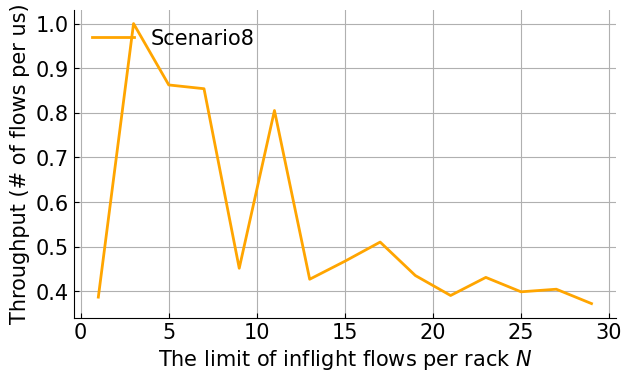

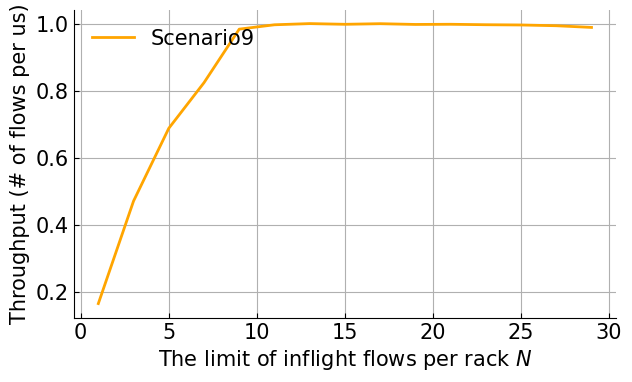

In [26]:
n_scenario=150
empirical_str = "eval_test_app"
legend_list=['ns-3','m4']
N_list=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
root_dir=f"/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/{empirical_str}"

config_file=f'/data1/lichenni/projects/per-flow-sim/parsimon-eval/expts/fig_8/spec/{empirical_str}.mix.json'
configs=json.load(open(config_file))

throughput_list=[]
for i in range(n_scenario):
    if os.path.exists(f'{root_dir}/{i}/ns3/fct_topology_flows.npy'):
        file_path=f"{root_dir}/{i}/ns3/fct_topology_flows.txt"
        with open(file_path, "r") as file:
            reader = csv.reader(file, delimiter=" ")
            fats, fcts = [], []
            for row in reader:
                # Remove empty strings caused by multiple spaces
                cleaned_row = [item for item in row if item.strip() != ""]
                # Extract the last third and second columns
                if len(cleaned_row) >= 3:
                    fats.append(cleaned_row[-3])
                    fcts.append(cleaned_row[-2])
            
            # Convert to numpy arrays and calculate throughput
            fats = np.array(fats).astype(np.int64)
            fcts = np.array(fcts).astype(np.int64)
            end_time = np.max(fats + fcts)-1e9
            if i%10==0:
                print(f"S=0, N={N_list[i%10]}, #flows: {len(fats)}, end_time: {end_time}")
            throughput = len(fats) / (end_time / 1e3)
            throughput_list.append(throughput)
            
throughput_list=np.array(throughput_list)
print(f"throughput_list: {throughput_list.shape}")
fig_idx=0
plot_cdf(
    [throughput_list],
    # f"./figs/eva_cdf_mean.pdf",
    None,
    legend_list,
    x_label="Throughput (# of flows per us)",
    log_switch=False,
    rotate_xaxis=False,
    # ylim_low=90,
    # xlim=150,
    # xlim_bottom=0.01,
    fontsize=15,
    legend_font=18,
    loc=4,
    enable_abs=True,
    group_size=5,
    colors=["orange",
    "cornflowerblue"],
    fig_idx=fig_idx,
)
fig_idx+=1

# Group scenarios into configurations
group_size = len(N_list)
num_configs = len(throughput_list) // group_size
config_labels = [f"$S$={n}" for n in range(num_configs)]

print(f"")
raw_data=[]
for i in range(num_configs):
    tmp=[]
    for j in range(group_size):
        tmp.append(throughput_list[j*num_configs+i])
    tmp=np.array(tmp)
    tmp/=np.max(tmp)
    raw_data.append((N_list,tmp))

# Plot the data
for i in range(num_configs):
    plot_lines(
        [raw_data[i]],
        file_name=None,
        linelabels=[f"Scenario{i}"],
        x_label="The limit of inflight flows per rack $N$",
        y_label="Throughput (# of flows per us)",
        log_switch=False,
        rotate_xaxis=False,
        ylim=None,
        xlim=None,
        fontsize=15,
        legend_font=15,
        loc=2,
        legend_cols=1,
        # title="Throughput Across Scenarios",
        fig_size=(7, 4),
        colors=["orange", "cornflowerblue"],  # Example colors
        fig_idx=fig_idx,
    )
    fig_idx+=1
# plot_lines(
#     raw_data=[raw_data[5]],
#     file_name=None,
#     linelabels=config_labels,
#     x_label="The limit of inflight flows per rack $N$",
#     y_label="Throughput (# of flows per us)",
#     log_switch=False,
#     rotate_xaxis=False,
#     ylim=None,
#     xlim=None,
#     fontsize=15,
#     legend_font=15,
#     loc=2,
#     legend_cols=1,
#     # title="Throughput Across Scenarios",
#     fig_size=(7, 4),
#     colors=["orange", "cornflowerblue", "green", "purple", "red"],  # Example colors
#     fig_idx=fig_idx,
# )
# plt.show()
